# Loading matlab data (and doing some preprocessing)

In [15]:
import os
import numpy as np
import scipy.io as sio
import h5py
import matplotlib.pyplot as plt 

# signal processing 
import scipy.signal as ssignal

# fancy plot stuff 
import sciplotlib.style as splstyle
import sciplotlib.polish as splpolish 

# Bokeh
import bokeh.plotting as bkplot

# Pandas
import pandas as pd

## Load matlab file

In [2]:
mat_filepath = '/home/timsit/mecp2/data/PAT200219_2C_DIV17.mat'

In [3]:
f = h5py.File(mat_filepath)
data_dict = {}
for k, v in f.items():
    data_dict[k] = np.array(v)

/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [4]:
data_dict['channels']

array([[47., 48., 46., 45., 38., 37., 28., 36., 27., 17., 26., 16., 35.,
        25., 15., 14., 24., 34., 13., 23., 12., 22., 33., 21., 32., 31.,
        44., 43., 41., 42., 52., 51., 53., 54., 61., 62., 71., 63., 72.,
        82., 73., 83., 64., 74., 84., 85., 75., 65., 86., 76., 87., 77.,
        66., 78., 67., 68., 55., 56., 58., 57.]])

## Have a look at the raw data

In [9]:
raw_traces = data_dict['dat']
fs = data_dict['fs'][0][0]
num_channels = np.shape(raw_traces)[0]
num_samples = np.shape(raw_traces)[1]
time = np.arange(num_samples) / fs

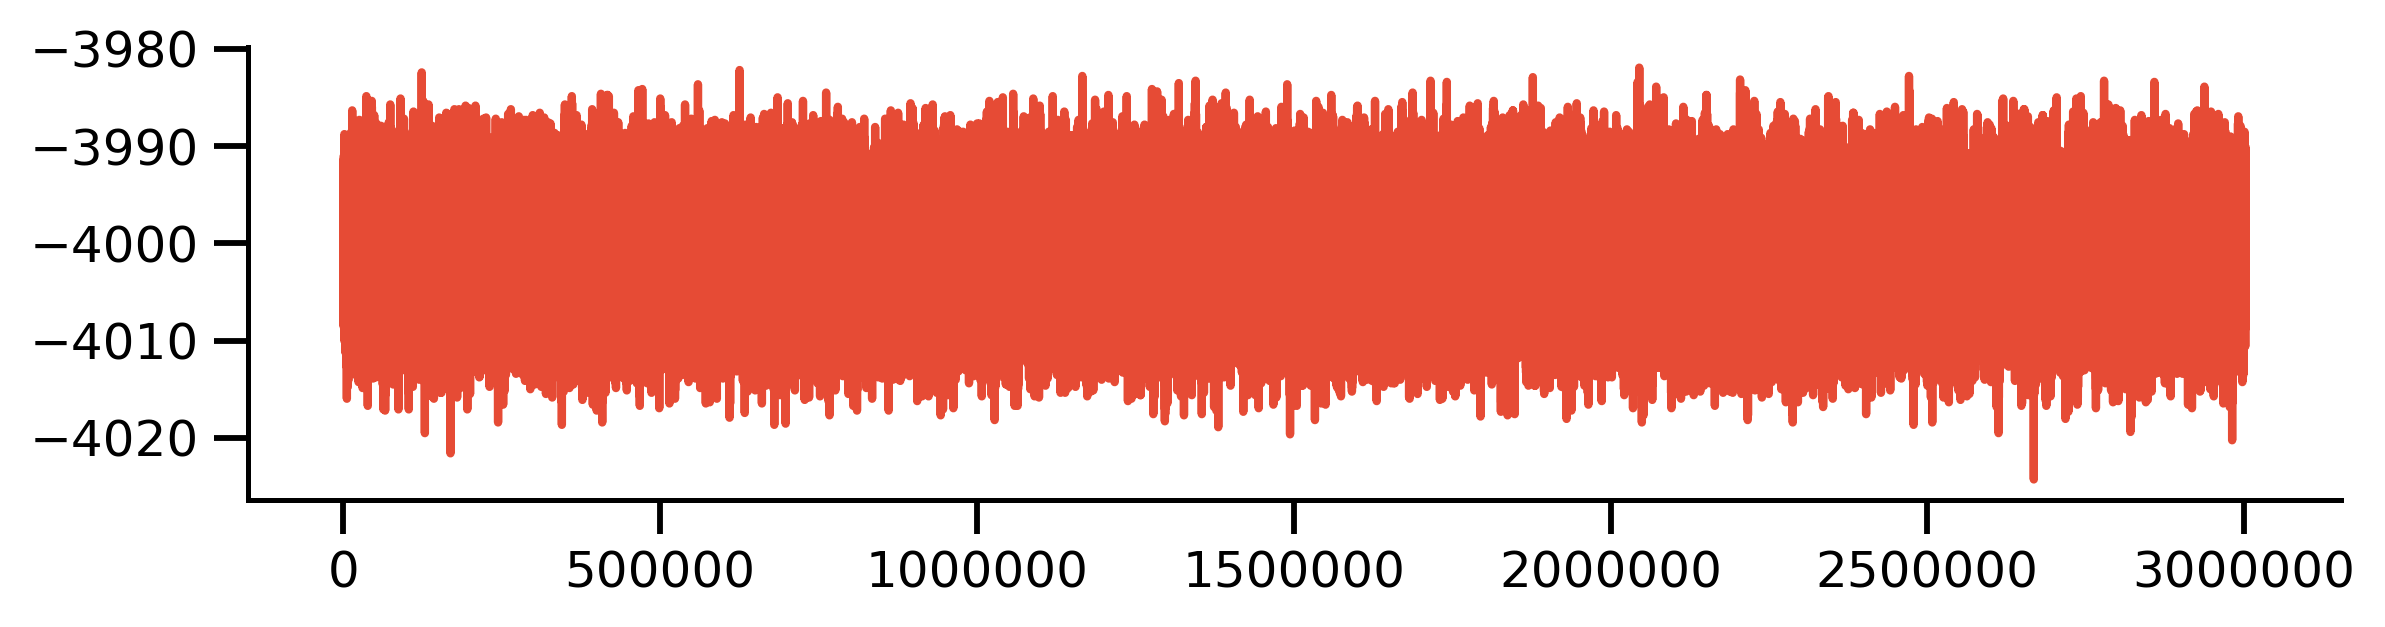

In [6]:
channel_num = 0
with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 2)
    ax.plot(raw_traces[channel_num, :])

## Make bokeh plot with datashader to allow quick and interactive zooming

In [11]:
import datashader as ds 
import holoviews as hv 
from holoviews.operation.datashader import datashade, shade, dynspread, rasterize
from bokeh.plotting import figure, output_file, show
channel_num = 1
curve = hv.Curve((time, raw_traces[channel_num, :]))
fig = datashade(curve, cmap=["blue"]).opts(width=800)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
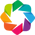

In [22]:
import pandas as pd
import numpy as np
import datashader as ds
import datashader.transfer_functions as tf

# Constants
np.random.seed(1)
n = 1000000 # Number of points
f = filter_width = 5000 # momentum or smoothing parameter, for a moving average filter

# filtered random walk
xs = np.convolve(np.random.normal(0, 0.1, size=n), np.ones(f)/f).cumsum()
ys = np.convolve(np.random.normal(0, 0.1, size=n), np.ones(f)/f).cumsum()

# Add "mechanical" wobble on the x axis
xs += 0.1*np.sin(0.1*np.array(range(n-1+f)))

# Add "measurement" noise
xs += np.random.normal(0, 0.005, size=n-1+f)
ys += np.random.normal(0, 0.005, size=n-1+f)

# Add a completely incorrect value
xs[int(len(xs)/2)] = 100
ys[int(len(xs)/2)] = 0

# Create a dataframe
df = pd.DataFrame(dict(x=xs,y=ys))

# Default plot ranges:
x_range = (xs.min(), xs.max())
y_range = (ys.min(), ys.max())

df.tail()


def create_image(x_range=x_range, y_range=y_range, w=500, h=500):
    cvs = ds.Canvas(x_range=x_range, y_range=y_range, plot_height=h, plot_width=w)
    agg = cvs.line(df, 'x', 'y', agg=ds.any())
    return tf.shade(agg)


from holoviews.operation.datashader import datashade
import holoviews as hv
hv.extension('bokeh')

In [23]:
opts = hv.opts.RGB(width=500, height=500)
datashade(hv.Path(df, kdims=['x','y']), normalization='linear', aggregator=ds.any()).opts(opts)

:DynamicMap   []
   :RGB   [x,y]   (R,G,B,A)

In [33]:
len(raw_trace_df)

3002500

In [16]:
raw_trace_df = pd.DataFrame({'Time': time, 'Channel_1': raw_traces[1, :]})
opts = hv.opts.RGB(width=800, height=300)
datashade(hv.Path(raw_trace_df, kdims=['Time','Channel_1']), normalization='linear', aggregator=ds.any()).opts(opts)

AttributeError: type object 'opts' has no attribute 'RGB'

#### Do the above but with the more conventional curve instead

In [24]:
raw_trace_df = pd.DataFrame({'Time': time, 'Channel_1': raw_traces[1, :]})
opts = hv.opts.RGB(width=800, height=300)
fig = datashade(hv.Curve((raw_trace_df['Time'],raw_trace_df['Channel_1'])), normalization='linear', aggregator=ds.any()).opts(opts)

In [25]:
fig

:DynamicMap   []
   :RGB   [x,y]   (R,G,B,A)

### Plotting multiple channels

See: https://datashader.org/user_guide/Timeseries.html

In [19]:
raw_trace_df = pd.DataFrame(raw_traces.T)
raw_trace_df['Time'] = time

In [20]:
raw_trace_df

0          1          2          3          4          5  \
0       -3999.1413 -3999.8739 -4007.0778 -3994.3794 -3993.2805 -4004.0253   
1       -4000.8507 -4002.1938 -4006.1010 -3995.8446 -3993.7689 -4004.3916   
2       -4002.5601 -4006.1010 -4004.8800 -3998.1645 -3995.8446 -4002.4380   
3       -4002.4380 -4007.1999 -4003.6590 -3999.5076 -3996.6993 -4000.8507   
4       -3999.8739 -4003.6590 -4002.9264 -3997.4319 -3995.1120 -4000.6065   
...            ...        ...        ...        ...        ...        ...   
3002495 -4004.0253 -3997.6761 -4007.8104 -4001.4612 -4001.3391 -3999.3855   
3002496 -4004.6358 -3996.2109 -4006.9557 -4001.2170 -4001.4612 -3998.4087   
3002497 -4004.0253 -3995.2341 -4006.5894 -4001.4612 -4001.0949 -3997.0656   
3002498 -4001.4612 -3995.2341 -4006.8336 -4001.4612 -4001.3391 -3996.0888   
3002499 -3998.7750 -3996.8214 -4005.4905 -4001.5833 -4002.3159 -3996.2109   

                 6          7          8          9  ...         51  \
0       -3990.1059 -3994.2573 -4000.7286 -4003.9032  ... -4002.9264   
1       -3989.4954 -3992.5479 -3999.2634 -4003.0485  ... -4001.4612   
2       -3990.7164 -3993.6468 -3998.4087 -4001.5833  ... -3999.8739   
3       -3991.6932 -3996.8214 -3997.4319 -4000.7286  ... -3999.1413   
4       -3991.4490 -4000.4844 -3996.2109 -4001.8275  ... -4000.1181   
...            ...        ...        ...        ...  ...        ...   
3002495 -3997.4319 -3995.3562 -4004.2695 -4000.1181  ... -3996.8214   
3002496 -3999.1413 -3995.9667 -4004.7579 -4001.3391  ... -3994.7457   
3002497 -3999.5076 -3997.1877 -4004.5137 -4001.3391  ... -3995.7225   
3002498 -3998.1645 -3996.2109 -4004.5137 -4000.1181  ... -3998.6529   
3002499 -3998.2866 -3995.7225 -4004.8800 -3999.2634  ... -4000.8507   

                52         53         54         55         56         57  \
0       -3999.1413 -3999.2634 -4000.2402 -4004.3916 -4005.3684 -3999.3855   
1       -4001.0949 -3998.7750 -4001.0949 -4003.6590 -4006.9557 -4000.7286   
2       -4000.1181 -3999.0192 -4003.7811 -4002.9264 -4009.2756 -4002.1938   
3       -3998.6529 -3999.2634 -4005.9789 -4002.9264 -4009.3977 -4002.6822   
4       -3998.2866 -3997.6761 -4005.4905 -4003.2927 -4008.9093 -4001.7054   
...            ...        ...        ...        ...        ...        ...   
3002495 -4007.1999 -4001.7054 -3999.5076 -3998.8971 -3997.9203 -4002.9264   
3002496 -4007.3220 -4000.1181 -4000.2402 -3997.4319 -3998.5308 -4002.1938   
3002497 -4005.2463 -3998.2866 -3999.9960 -3996.9435 -3998.8971 -4002.0717   
3002498 -4001.0949 -3996.4551 -4000.1181 -3999.1413 -3998.5308 -4001.9496   
3002499 -3999.3855 -3995.1120 -4000.6065 -4001.8275 -3998.0424 -4001.2170   

                58         59       Time  
0       -4001.0949 -3996.9435    0.00000  
1       -3999.8739 -3996.9435    0.00004  
2       -3999.2634 -3996.2109    0.00008  
3       -3999.2634 -3994.7457    0.00012  
4       -3999.6297 -3994.3794    0.00016  
...            ...        ...        ...  
3002495 -4005.1242 -3997.9203  120.09980  
3002496 -4005.4905 -3997.3098  120.09984  
3002497 -4005.9789 -3995.9667  120.09988  
3002498 -4006.2231 -3995.3562  120.09992  
3002499 -4005.2463 -3996.4551  120.09996  

[3002500 rows x 61 columns]

In [21]:
cols = [1]
opts = hv.opts.RGB(width=600, height=300)
ndoverlay = hv.NdOverlay({c:hv.Curve((raw_trace_df['Time'], raw_trace_df[c]), kdims=['Time'], vdims=['Value']) for c in cols})
datashader_object = datashade(ndoverlay, normalization='linear', aggregator=ds.count()).opts(opts)

AttributeError: type object 'opts' has no attribute 'RGB'

In [62]:
type(datashader_object)

holoviews.core.spaces.DynamicMap

### Plotting multiple time series and highlighting them via the legend selection

Note that currently you need to use dummy points to do this:
    https://datashader.org/getting_started/Interactivity.html.
    
Actually the sample is more clear here: http://holoviews.org/user_guide/Large_Data.html

In [73]:
cols = [1, 2, 3]
opts = hv.opts.RGB(width=600, height=300)
ndoverlay = hv.NdOverlay({c:hv.Curve((raw_trace_df['Time'], raw_trace_df[c]), kdims=['Time'], vdims=['Value']) for c in cols})
datashader_object = datashade(ndoverlay, normalization='linear', aggregator=ds.count()).opts(opts)

In [74]:
from datashader.colors import Sets1to3 # default datashade() and shade() color cycle
num_ks = len(cols)
color_key = list(enumerate(Sets1to3[0:num_ks]))
color_points = hv.NdOverlay({k: hv.Points([-4000,-4000], label=str(k)).opts(color=v) for k, v in color_key})

In [75]:
color_points * datashader_object

:DynamicMap   []
   :Overlay
      .NdOverlay.A_0 :NdOverlay   [Element]
         :Points   [x,y]
      .RGB.I         :RGB   [Time,Value]   (R,G,B,A)

### Wrapping the above in a figure


In [6]:
figure = bkplot.figure(width=250, plot_height=250, title=None)

In [7]:
figure

Figure(id='1032', ...)

## First attempt to move some of the spike detection code to python

In [80]:
25000 / 2500

10.0

In [95]:
def detect_spikes(spike_data, method='manuel', fs=25000, multiplier=5):
    """
    Detection of spikes from raw MEA data.
    
    Parameters 
    -----------
    method : (str)
        method used to perform spike detection
    fs : (int)
        sampling rate
    """
    
    if method == 'manuel':
        low_pass = 600
        high_pass = 8000 
        filter_order = 3
        
        wn = np.array([low_pass, high_pass]) / (fs / 2)
        
        b, a = ssignal.butter(filter_order, Wn=wn, btype='bandpass')
        
        filtered_data = ssignal.filtfilt(b, a, spike_data)
        
        # finding threshold and spikes
        m = np.mean(filtered_data); 
        s = np.std(filtered_data); 
        threshold = m - multiplier * s; 
        neg_threshold = m - 8 * s; # maximum threshold, a simple artefact removal method 
        spike_train = (filtered_data < threshold).astype(int)
        
        
        # Impose refractory period 
        ref_period = 2.0 * 10 ** -3 * fs
        
        # for spike_idx in np.arange(len(spike_train)):
        #    if spike_train[]
        
        
    elif method == 'cwt':
        
        # Filter
        lowpass = 600; 
        highpass = 8000; 
        
        wn = np.array([lowpass, highpass]) / (fs / 2); 
        
        filterOrder = 3;
        [b, a] =ssignal.butter(filterOrder, wn, btype='bandpass'); 
        filtered_data = ssignal.filtfilt(b, a, spike_data); 
    
    
    else:
        print('No valid spike detection method specified, returning None')
        spike_train = None
        

    return spike_train


def down_sample_spike_matrix(spike_matrix, down_sample_factor=2500):
    
    
    original_num_samp = np.shape(spike_matrix)[1]
    new_num_samp = original_num_samp / down_sample_factor 
    reshaped_spike_matrix = np.reshape(spike_matrix, (int(num_channels), int(new_num_samp), -1))
    down_sampled_matrix = np.sum(reshaped_spike_matrix, axis=-1)
    
    return down_sampled_matrix

In [70]:
spike_train = detect_spikes(spike_data=raw_traces)
np.sum(spike_train)

20147

In [72]:
spike_train_list = list()
for channel in np.arange(num_channels):
    spike_train = detect_spikes(spike_data=raw_traces[channel, :])
    spike_train_list.append(spike_train)



In [75]:
spike_matrix = np.stack(spike_train_list)

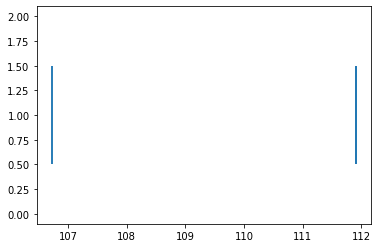

In [55]:
fig, ax = plt.subplots()
ax.eventplot(time[np.where(spike_train)])

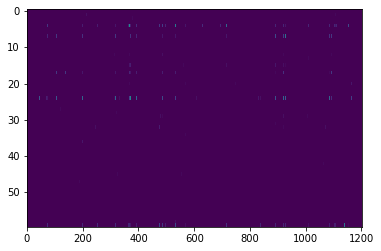

In [96]:
fig, ax = plt.subplots()
down_sample_matrix = down_sample_spike_matrix(spike_matrix)
ax.imshow(down_sample_matrix, aspect='auto')

In [93]:
down_sample_factor = 2500


In [91]:
np.shape(reshaped_spike_matrix)

(60, 1201, 2500)

In [94]:
np.shape(down_sampled_matrix)

(60, 1201)

In [88]:
new_num_samp

1201.0